<a href="https://colab.research.google.com/github/DinhHuySang/price-house-prediction---HIT/blob/master/Price_house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/Shared drives/Drive của Sáng/Price_House_prediction

/content/drive/Shared drives/Drive của Sáng/Price_House_prediction


In [0]:
df = pd.read_csv('kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
df.shape

(21613, 21)

# get feature

In [0]:
price = df['price']
floor = df['floors']
feature = df['sqft_living']
feature2 = df['sqft_living15']

In [0]:
feature = np.array(feature)
feature2 = np.array(feature2)

price = np.array(price)

# normalize data

In [0]:
feature = ((feature-np.mean(feature)))/(np.max(feature)-np.mean(feature))
feature2 = ((feature2-np.mean(feature2)))/(np.max(feature2)-np.mean(feature2))

# visual data

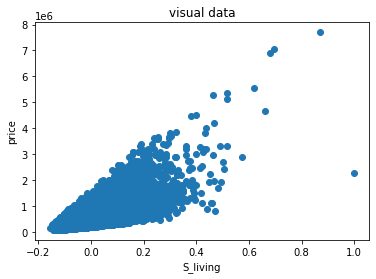

In [0]:
plt.title('visual data')
plt.xlabel('S_living')
plt.ylabel('price')
plt.scatter(feature,price)
plt.show()

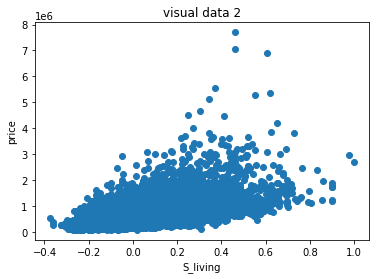

In [0]:
plt.title('visual data 2')
plt.xlabel('S_living')
plt.ylabel('price')
plt.scatter(feature2,price)
plt.show()

In [0]:
#delete noise data
ignore = np.where(feature>=0.8)
ignore2 = np.where(price>4000000)
ignore = np.append(ignore, ignore2)
print(ignore)

[ 7252 12777  1164  1315  1448  2626  3914  4411  7252  8092  8638  9254
 12370]


In [0]:
frame = np.c_[np.ones((np.size(feature),1)),feature, feature2, price]
frame.shape

(21613, 4)

In [0]:
frame = np.delete(frame,ignore,axis = 0)
frame.shape

(21601, 4)

In [0]:
price = frame[:, 3]
feature = frame[:,:3]
print(feature.shape)
print(price.shape)

(21601, 3)
(21601,)


In [0]:
price = np.reshape(price,(21601,1))
price

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(feature,price,test_size = 0.15, random_state = 20)


# gradient descent

In [0]:
def predict(x,theta):
    return np.dot(x, theta)

In [0]:
def error(x,y,theta):
    y_pre = predict(x,theta)
    return np.mean((y-y_pre)**2)

In [0]:
def compute_cost(x,y,theta):
    errors = error(x,y,theta)
    return 1/2 * errors

In [0]:
def gradient_descent(x,y,theta,learning_rate,num_iter): 
    cost_list = []
    cost_list.append(1e100)
    theta_list = []
    m = np.size(y)
    i=0
    while 1:
      i+=1
      cost = compute_cost(x,y,theta)
      cost_list.append(cost)
      theta-= learning_rate*np.dot(x.T,np.dot(x, theta) - y)/m
      theta_list.append(theta)
      print(i)
      print("cost",cost)
      print('cost_list[i-1]-cost_list[i]',cost_list[i-1]-cost_list[i])
      print(' ')
      if cost_list[i-1]-cost_list[i] < 1e-9:
          break
    return theta_list, cost_list

In [0]:
learning_rate = 0.01
num_iter = 5000
theta = np.random.rand(X_train.shape[1]) 
theta = np.reshape(theta,(X_train.shape[1],1))
print(X_train.shape)
print(theta.shape)

(18360, 3)
(3, 1)


In [0]:
theta_list, cost_list = gradient_descent(X_train,y_train,theta,learning_rate,num_iter)

Streaming output truncated to the last 5000 lines.
cost 31050801169.433987
cost_list[i-1]-cost_list[i] 1.52587890625e-05
 
512307
cost 31050801169.43397
cost_list[i-1]-cost_list[i] 1.52587890625e-05
 
512308
cost 31050801169.43396
cost_list[i-1]-cost_list[i] 1.1444091796875e-05
 
512309
cost 31050801169.433945
cost_list[i-1]-cost_list[i] 1.52587890625e-05
 
512310
cost 31050801169.433933
cost_list[i-1]-cost_list[i] 1.1444091796875e-05
 
512311
cost 31050801169.433918
cost_list[i-1]-cost_list[i] 1.52587890625e-05
 
512312
cost 31050801169.433907
cost_list[i-1]-cost_list[i] 1.1444091796875e-05
 
512313
cost 31050801169.43389
cost_list[i-1]-cost_list[i] 1.52587890625e-05
 
512314
cost 31050801169.43388
cost_list[i-1]-cost_list[i] 1.1444091796875e-05
 
512315
cost 31050801169.433865
cost_list[i-1]-cost_list[i] 1.52587890625e-05
 
512316
cost 31050801169.43385
cost_list[i-1]-cost_list[i] 1.52587890625e-05
 
512317
cost 31050801169.433838
cost_list[i-1]-cost_list[i] 1.1444091796875e-05
 
512

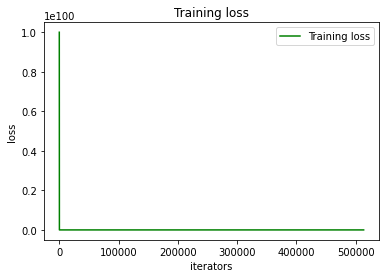

In [0]:
plt.plot(cost_list, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('iterators')
plt.ylabel('loss')
plt.legend()
plt.show()

# Prediction

In [0]:
theta_out = theta_list[-1]

In [0]:
y_pre = predict(X_test,theta_out)
print((y_pre-y_test)**2)


[[1.09117742e+11]
 [1.13200493e+11]
 [4.84735012e+09]
 ...
 [4.94263369e+10]
 [1.51320835e+11]
 [2.79894972e+11]]


# use sklearn



In [0]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [0]:
y_predict = reg.predict(X_test)
print((y_test-y_predict)**2)


[[1.09117558e+11]
 [1.13200696e+11]
 [4.84735530e+09]
 ...
 [4.94265353e+10]
 [1.51322485e+11]
 [2.79893946e+11]]
